In [1]:
# Project for Human Capital Supply and Demand
# Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading Excel file
Headcount = pd.read_excel('Demandv1.1.xlsx', 'Headcount',header=0)
Demand_LY = pd.read_excel('Demandv1.1.xlsx', 'Demand Trend Last year',header=0)

In [3]:
Demand_LY.head()

,Month DD Raised,No. of FTE Request Raised,SkillList,Location,Experience Grade,Practice,Skill Group,Demand Source
0,May,4,Salesforce (Functional),Bangalore,A4,BANK,(F) IT Operations,Account
1,October,2,"Amazon Web services - Build , Administration a...",Bhubaneswar,B2,M&FT,(F) IT Operations,Account
2,March,2,"Amazon Web services - Build , Administration a...",Pune,A3,TEST,NaN,Support
3,October,1,Test Automation,Bhubaneswar,B2,M&FT,(F) IT Operations,Account
4,June,2,PMO (Account),Noida,A5,I&D,(D) Banking Sector,Proactive


In [4]:
Demand_LY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 8 columns):
Month DD Raised              1023 non-null object
No. of FTE Request Raised    1023 non-null int64
SkillList                    1023 non-null object
Location                     1023 non-null object
Experience Grade             1023 non-null object
Practice                     1023 non-null object
Skill Group                  981 non-null object
Demand Source                1023 non-null object
dtypes: int64(1), object(7)
memory usage: 64.0+ KB


In [5]:
Demand_LY.describe()

,No. of FTE Request Raised
count,1023.000000
mean,2.482893
std,1.118012
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,4.000000


In [6]:
############################################
#  3.1 Create the summary table (Demand_LY): #        
############################################

Demand_LY.pivot_table('No. of FTE Request Raised', index='Month DD Raised', columns='Skill Group')

Skill Group,(D) Banking Sector,(D) Capital Markets Sector,(D) Cards,(D) Consumer Products Sector,(D) Financial Services,(D) Healthcare Sector,(D) Insurance Sector,(D) Life Sciences Sector,(D) Technology / High tech / Software Sector,(D) Telecom Sector,...,(T) Other CRM & customer experience Packages,(T) Other Financial Solutions,(T) Other Oracle ERP,(T) Payment solutions,"(T) Project Tools, Methodologies and Frameworks",(T) Relational Databases,(T) Reporting/Business Intelligence,(T) Testing Tools / Testing Automation / Performance Testing Tools,(T) Web Development Technologies,"(T) Workflow, Business process management and Case management"
Month DD Raised,,,,,,,,,,,,,,,,,,,,,
August,2.181818,3.000000,2.666667,NaN,1.0,3.0,3.000000,1.0,NaN,NaN,...,NaN,NaN,2.0,NaN,2.000000,NaN,NaN,2.285714,3.000000,2.0
December,3.222222,2.666667,3.000000,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.600000,NaN,2.000000,2.333333,4.000000,3.0
February,2.384615,4.000000,NaN,NaN,2.0,NaN,3.500000,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,2.250000,3.000000,4.000000,3.166667,3.000000,NaN
January,2.363636,1.500000,2.000000,NaN,3.0,NaN,2.000000,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,3.000000,4.000000,3.666667,2.500000,2.500000,NaN
June,2.611111,1.000000,1.857143,NaN,NaN,4.0,2.000000,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,1.000000,2.000000,2.200000,2.571429,2.333333,4.0
March,2.500000,2.571429,3.500000,NaN,2.0,NaN,2.400000,NaN,NaN,NaN,...,NaN,NaN,4.0,2.0,2.285714,3.000000,2.625000,2.000000,3.000000,NaN
May,2.111111,3.000000,1.750000,1.0,NaN,NaN,2.000000,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.666667,NaN,NaN,2.000000,2.500000,NaN
October,2.296296,3.500000,2.818182,4.0,4.0,NaN,3.666667,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,1.800000,2.333333,2.833333,2.571429,3.000000,3.0


In [7]:
Demand_LY.groupby(['Skill Group', 'Month DD Raised'])['No. of FTE Request Raised'].aggregate('sum').unstack()

Month DD Raised,August,December,February,January,June,March,May,October
Skill Group,,,,,,,,
(D) Banking Sector,48.0,29.0,31.0,26.0,47.0,55.0,19.0,62.0
(D) Capital Markets Sector,9.0,8.0,4.0,3.0,4.0,18.0,9.0,21.0
(D) Cards,24.0,6.0,NaN,2.0,13.0,14.0,7.0,31.0
(D) Consumer Products Sector,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0
(D) Financial Services,1.0,4.0,2.0,3.0,NaN,2.0,NaN,4.0
(D) Healthcare Sector,6.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
(D) Insurance Sector,3.0,NaN,7.0,2.0,8.0,12.0,2.0,11.0
(D) Life Sciences Sector,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN
(D) Technology / High tech / Software Sector,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [8]:
###################################
#  2.1.2 Missing value analysis   #
###################################
    
# checking for missing values in dataset
for i in Demand_LY.columns :
    print(i, Demand_LY[i].isnull().sum())   

Month DD Raised 0
No. of FTE Request Raised 0
SkillList 0
Location 0
Experience Grade 0
Practice 0
Skill Group 42
Demand Source 0


In [9]:
# Create dataframe with missing percentage
missing_val = pd.DataFrame(Demand_LY.isnull().sum())
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index' : 'Attributes', 0 : 'Cnt of Miss'})
missing_val['% Miss'] = (missing_val['Cnt of Miss']/len(Demand_LY))*100
missing_val = missing_val.sort_values('% Miss', ascending = False).reset_index(drop = True)
missing_val

,Attributes,Cnt of Miss,% Miss
0,Skill Group,42,4.105572
1,Month DD Raised,0,0.000000
2,No. of FTE Request Raised,0,0.000000
3,SkillList,0,0.000000
4,Location,0,0.000000
5,Experience Grade,0,0.000000
6,Practice,0,0.000000
7,Demand Source,0,0.000000


In [10]:
# Converting to category levels
for i in range(0,Demand_LY.shape[1]) :
    #print(i)
    if (Demand_LY.iloc[:,i].dtypes == 'object'):
        Demand_LY.iloc[:,i] = pd.Categorical(Demand_LY.iloc[:,i])
        Demand_LY.iloc[:,i] = Demand_LY.iloc[:,i].cat.codes

Demand_LY['Skill Group'] = Demand_LY['Skill Group'].replace(-1,np.nan)

# Imutation by Mode 
Demand_LY['Skill Group'] = Demand_LY['Skill Group'].fillna(Demand_LY['Skill Group'].mode()[0])

for i in Demand_LY.columns :
    print(i, Demand_LY[i].isnull().sum())

Month DD Raised 0
No. of FTE Request Raised 0
SkillList 0
Location 0
Experience Grade 0
Practice 0
Skill Group 0
Demand Source 0


In [11]:
#as i am getting error dues to names i am changing the column names
df1=Demand_LY.copy()
df1 = df1.rename(columns = {'No. of FTE Request Raised' : 'NumFTERequired', 'Month DD Raised' : 'Month',
                            'Experience Grade': 'Experience', 'Skill Group' : 'SkillGroup', 
                            'Demand Source' : 'DemandSource'})
df1.columns=df1.columns.str.replace(' ','_')
list(df1)
df1.isnull().sum()
#np.warnings.filterwarnings('ignore')

Month             0
NumFTERequired    0
SkillList         0
Location          0
Experience        0
Practice          0
SkillGroup        0
DemandSource      0
dtype: int64

In [12]:
# effect of factor variables with target variable 
from statsmodels.formula.api import ols
import statsmodels.api as sm
print('#### Anova Test Month DD Raised ####')
model_1=ols('NumFTERequired ~ C(Month)',data=df1).fit()
print('Null Hypothesis Accepted : means are all equal')
print(sm.stats.anova_lm(model_1, typ=1))

print('#### Anova Test Skill List #### ')
model_2=ols('NumFTERequired ~ C(SkillList)',data=df1).fit() 
print('Null Hypothesis Accepted : means are all equal')
print(sm.stats.anova_lm(model_2, typ=1))

print('#### Anova Test Location ####')
model_3=ols('NumFTERequired ~ C(Location)',data=df1).fit()
print('Null Hypothesis Accepted : means are all equal')
print(sm.stats.anova_lm(model_3, typ=1))

print('#### Anova Test Experience ####')
model_4=ols('NumFTERequired ~ C(Experience)',data=df1).fit()
print('Null Hypothesis Accepted : means are all equal')
print(sm.stats.anova_lm(model_4, typ=1))

print('#### Anova Test Practice ####')
model_5=ols('NumFTERequired ~ C(Practice)',data=df1).fit() 
print('Null Hypothesis Accepted : means are all equal')
print(sm.stats.anova_lm(model_5, typ=1))

print('#### Anova Test Skill Group ####')
model_6=ols('NumFTERequired ~ C(SkillGroup)',data=df1).fit()
print('Null Hypothesis Accepted : means are all equal')
print(sm.stats.anova_lm(model_6, typ=1))

print('#### Anova Test DemandSource ####S')
model_7=ols('NumFTERequired ~ C(DemandSource)',data=df1).fit()
print('Null Hypothesis Accepted : means are all equal')
print(sm.stats.anova_lm(model_7, typ=1))

#### Anova Test Month DD Raised ####
Null Hypothesis Accepted : means are all equal
              df       sum_sq   mean_sq        F    PR(>F)
C(Month)     7.0     6.636194  0.948028  0.75719  0.623459
Residual  1015.0  1270.814441  1.252034      NaN       NaN
#### Anova Test Skill List #### 
Null Hypothesis Accepted : means are all equal
                 df      sum_sq   mean_sq         F    PR(>F)
C(SkillList)  221.0  295.014063  1.334905  1.088375  0.207753
Residual      801.0  982.436572  1.226513       NaN       NaN
#### Anova Test Location ####
Null Hypothesis Accepted : means are all equal
                 df       sum_sq   mean_sq        F    PR(>F)
C(Location)     7.0     6.636194  0.948028  0.75719  0.623459
Residual     1015.0  1270.814441  1.252034      NaN       NaN
#### Anova Test Experience ####
Null Hypothesis Accepted : means are all equal
                   df       sum_sq   mean_sq        F    PR(>F)
C(Experience)     7.0     6.636194  0.948028  0.75719  0.623459
Res

In [13]:
# checking importance of feature
drop_col = ['No. of FTE Request Raised']
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=200)
X = Demand_LY.drop(columns= drop_col)
y = Demand_LY['No. of FTE Request Raised']
reg.fit(X, y)
imp_feat = pd.DataFrame({'Feature': Demand_LY.drop(columns=drop_col).columns,
                         'importance':reg.feature_importances_})
imp_feat.sort_values(by = 'importance', ascending=False).reset_index(drop = True)

,Feature,importance
0,SkillList,0.428111
1,Skill Group,0.337848
2,Practice,0.066457
3,Demand Source,0.045822
4,Experience Grade,0.045253
5,Location,0.040429
6,Month DD Raised,0.036080


In [14]:
# checking importance of feature
drop_col = ['No. of FTE Request Raised']
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=200)
X = Demand_LY.drop(columns= drop_col)
y = Demand_LY['No. of FTE Request Raised']
reg.fit(X, y)
imp_feat = pd.DataFrame({'Feature': Demand_LY.drop(columns=drop_col).columns,
                         'importance':reg.feature_importances_})
imp_feat.sort_values(by = 'importance', ascending=False).reset_index(drop = True)


,Feature,importance
0,SkillList,0.424464
1,Skill Group,0.331940
2,Practice,0.067363
3,Demand Source,0.050598
4,Experience Grade,0.047127
5,Location,0.043115
6,Month DD Raised,0.035392


In [15]:
Demand_LY.head()

,Month DD Raised,No. of FTE Request Raised,SkillList,Location,Experience Grade,Practice,Skill Group,Demand Source
0,6,4,175,0,3,1,16.0,0
1,7,2,17,1,6,9,16.0,0
2,5,2,17,7,2,10,30.0,2
3,7,1,195,1,6,9,16.0,0
4,4,2,141,6,4,7,0.0,1


In [16]:
# Dummy Variable Creation
num_var = ['No. of FTE Request Raised']
cat_var = ['Month DD Raised', 'SkillList', 'Location','Experience Grade', 'Practice', 'Skill Group', 
           'Demand Source'] 
df1 = Demand_LY.applymap(int)
for i in cat_var:
    df1[i].astype('str')
temp1 = pd.DataFrame(Demand_LY['No. of FTE Request Raised'])
#temp1 = temp1.join(SampleData[num_var]), as no numeric independent variables
for i in cat_var:
    d = pd.get_dummies(Demand_LY[i],prefix = i)
    temp1 = temp1.join(d)
data_hotencod = temp1
data_hotencod.shape,data_hotencod.columns

((1023, 313),
 Index(['No. of FTE Request Raised', 'Month DD Raised_0', 'Month DD Raised_1',
        'Month DD Raised_2', 'Month DD Raised_3', 'Month DD Raised_4',
        'Month DD Raised_5', 'Month DD Raised_6', 'Month DD Raised_7',
        'SkillList_0',
        ...
        'Skill Group_45.0', 'Skill Group_46.0', 'Skill Group_47.0',
        'Skill Group_48.0', 'Skill Group_49.0', 'Skill Group_50.0',
        'Skill Group_51.0', 'Demand Source_0', 'Demand Source_1',
        'Demand Source_2'],
       dtype='object', length=313))

In [17]:
data_hotencod.head()

,No. of FTE Request Raised,Month DD Raised_0,Month DD Raised_1,Month DD Raised_2,Month DD Raised_3,Month DD Raised_4,Month DD Raised_5,Month DD Raised_6,Month DD Raised_7,SkillList_0,...,Skill Group_45.0,Skill Group_46.0,Skill Group_47.0,Skill Group_48.0,Skill Group_49.0,Skill Group_50.0,Skill Group_51.0,Demand Source_0,Demand Source_1,Demand Source_2
0,4,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
# Hot Encoded/dummy Varibles Data
# Feature Importance Matrix Random Forest for 
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=300).fit(data_hotencod.iloc[:,1:],data_hotencod.iloc[:,0])
importances = list(rf_model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(data_hotencod.columns),
                                                                                      importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: SkillList_11         Importance: 0.02
Variable: SkillList_87         Importance: 0.02
Variable: Practice_10          Importance: 0.02
Variable: Skill Group_29.0     Importance: 0.02
Variable: Skill Group_51.0     Importance: 0.02
Variable: Demand Source_0      Importance: 0.02
Variable: Month DD Raised_3    Importance: 0.01
Variable: Month DD Raised_4    Importance: 0.01
Variable: SkillList_9          Importance: 0.01
Variable: SkillList_14         Importance: 0.01
Variable: SkillList_16         Importance: 0.01
Variable: SkillList_17         Importance: 0.01
Variable: SkillList_21         Importance: 0.01
Variable: SkillList_24         Importance: 0.01
Variable: SkillList_30         Importance: 0.01
Variable: SkillList_62         Importance: 0.01
Variable: SkillList_67         Importance: 0.01
Variable: SkillList_75         Importance: 0.01
Variable: SkillList_83         Importance: 0.01
Variable: SkillList_88         Importance: 0.01
Variable: SkillList_89         Importanc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

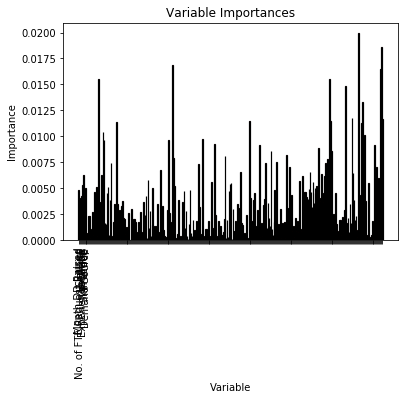

In [19]:
# lImportance plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, Demand_LY.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Number of features for 90% importance: 59


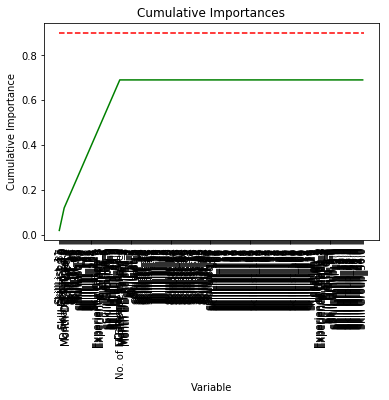

In [20]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');
# Find number of features for cumulative importance of 90%
# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.65)[0][0] + 1)

In [21]:
# checking importance of feature
drop_col = ['No. of FTE Request Raised']
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=300)
X = data_hotencod.drop(columns= drop_col)
y = data_hotencod['No. of FTE Request Raised']
reg.fit(X, y)
imp_feat = pd.DataFrame({'Feature': data_hotencod.drop(columns=drop_col).columns,
                         'importance':reg.feature_importances_})
imp_feat.sort_values(by = 'importance', ascending=False).reset_index(drop = True)

,Feature,importance
0,Demand Source_1,0.021761
1,Demand Source_0,0.019901
2,Practice_0,0.019064
3,SkillList_12,0.016995
4,Demand Source_2,0.016746
5,Skill Group_16.0,0.015857
6,SkillList_88,0.014406
7,SkillList_17,0.012986
8,SkillList_189,0.012721
9,Practice_9,0.012690


In [56]:
# splitting dataset in train and test for whole dataset after eda i.e. bike_data
X = data_hotencod.drop(columns=['No. of FTE Request Raised'])
y = data_hotencod['No. of FTE Request Raised']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

In [69]:
# Defining Model to predict and calculate error metrics
def model_pred(model) :
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred)))
    print('Model Score :', model.score(X_test, y_test))
    return

In [70]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
model = DecisionTreeRegressor()
model_pred(model)

RMSE :  1.428797891457762
Model Score : -0.8072993469559722


In [43]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dt_model=DecisionTreeRegressor(random_state=3).fit(X_train,y_train)
pred = dt_model.predict(X_test) 
print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred)))
print('Model Score :', rf_model.score(X_test, y_test))

RMSE :  1.4283710660885791
Model Score : -0.10857819188784701


In [44]:
#Random forest
from sklearn.ensemble import  RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=700).fit(X_train,y_train)
pred = rf_model.predict(X_test) 
print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred))),
print('Model Score :', rf_model.score(X_test, y_test))

RMSE :  1.1232464262649058
Model Score : -0.11696247095559253


In [45]:
#Linear Regression
import statsmodels.api as sm
lr_model = sm.OLS(y_train,X_train).fit()
pred = lr_model.predict(X_test)
print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred)))
#print('Model Score :', lr_model.score(X_test, y_test))#lr_model.summary()

RMSE :  1.190850642312722


In [46]:
#Ridge Regression
from sklearn.linear_model import Ridge, Lasso, LinearRegression,Lars
ridge_model=Ridge().fit(X_train,y_train)
pred = ridge_model.predict(X_test)
print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred)))
print('Model Score :', ridge_model.score(X_test, y_test))

RMSE :  1.1200419575291747
Model Score : -0.1105984787855201


In [47]:
#Lasso regression
lasso_model=Lasso().fit(X_train,y_train)
pred = lasso_model.predict(X_test)
print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred)))
print('Model Score :', lasso_model.score(X_test, y_test))

RMSE :  1.0728421535294617
Model Score : -0.018967069423394545


In [35]:
#Lars Regression
lars_model=Lars().fit(X_train,y_train)
pred = lars_model.predict(X_test)
print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred))),print('Model Score :', lars_model.score(X_test, y_test))

RMSE :  4.499804332735489e+30
Model Score : -1.7925684545140844e+61


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=3.065e-03, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 87 iterations, i.e. alpha=1.624e-03, with an active set of 87 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 112 iterations, i.e. alpha=1.114e-03, with an active set of 112 regressors, and the smallest cholesky pivot eleme

(None, None)

In [61]:
data_hotencod.shape

(1023, 313)

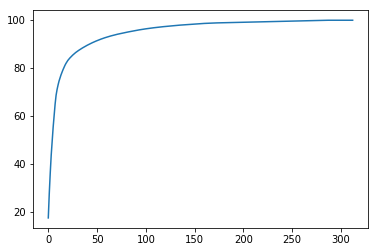

In [62]:
#data=data_hotencod.drop(['ID'],axis=1)
from sklearn.decomposition import PCA
pca = PCA(n_components=313)
pca.fit(data_hotencod.values)
#The amount of variance that each PC explained
var= pca.explained_variance_ratio_
#Cumulative Variance
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
#graph of the variance
plt.plot(var1)

In [63]:
#############################
## from the above plot
#The plot above shows that ~ 53 components explains around 99% variance in the data set.
#By using PCA we have reduced 72 predictors to 40 without compromising on explained variance.
#############################
#Looking at above plot I'm taking 40 variables
pca = PCA(n_components=53)
#now fitting the selected components to the data
pca.fit(data_hotencod.values)
#PCA selected features
X1=pca.fit_transform(data_hotencod.values)
#splitting train and test data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X1,data_hotencod['No. of FTE Request Raised'],
                                                                    test_size=0.2,random_state=42)

In [71]:
# PCA_Decision Tree
dt_model=DecisionTreeRegressor(random_state=3).fit(X_train_pca,y_train_pca)
pred = dt_model.predict(X_test_pca) 
print('RMSE : ',np.sqrt(mean_squared_error(y_test_pca,pred)))
#print('Model Score :', rf_model.score(X_test, y_test))

RMSE :  0.0


In [65]:
#PCA_Random forest
rf_model = RandomForestRegressor(n_estimators=700).fit(X_train_pca,y_train_pca)
pred = rf_model.predict(X_test_pca) 
print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred))),
print('Model Score :', rf_model.score(X_test_pca, y_test_pca))

RMSE :  1.6572089377669414
Model Score : 1.0


In [66]:
#Linear Regression
import statsmodels.api as sm
lr_model = sm.OLS(y_train_pca,X_train_pca).fit()
pred = lr_model.predict(X_test_pca)
print('RMSE : ',np.sqrt(mean_squared_error(y_test_pca,pred)))
#print('Model Score :', lr_model.score(X_test_pca, y_test_pca))#lr_model.summary()

RMSE :  2.654005923569303


In [67]:
#Ridge Regression
ridge_model=Ridge().fit(X_train_pca,y_train_pca)
pred = ridge_model.predict(X_test_pca)
print('RMSE : ',np.sqrt(mean_squared_error(y_test_pca,pred)))
print('Model Score :', ridge_model.score(X_test_pca, y_test_pca))

RMSE :  0.001977326264924357
Model Score : 0.9999968836977942


In [68]:
#Lasso regression
lasso_model=Lasso().fit(X_train_pca,y_train_pca)
pred = lasso_model.predict(X_test_pca)
print('RMSE : ',np.sqrt(mean_squared_error(y_test_pca,pred)))
print('Model Score :', lasso_model.score(X_test_pca, y_test_pca))

RMSE :  0.9021389687059362
Model Score : 0.35132108333650447


In [60]:
#Lars Regression
lars_model=Lars().fit(X_train_pca,y_train_pca)
pred = lars_model.predict(X_test_pca)
print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred))),print('Model Score :', lars_model.score(X_test_pca, y_test_pca))

RMSE :  1.6572307352378184
Model Score : 0.9999994549627828


(None, None)

In [75]:
#Ridge Regression
from sklearn.linear_model import Ridge, Lasso, LinearRegression,Lars
ridge_model = Ridge().fit(X_train_pca,y_train_pca)
pred =ridge_model.predict(X_test_pca)
print('RMSE : ',np.sqrt(mean_squared_error(y_test,pred))),
print('Model Score :', ridge_model.score(X_test_pca, y_test_pca))

RMSE :  1.6562499010278537
Model Score : 0.9999968836977942
